In [1]:
pip install telepot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for telepot: filename=telepot-12.7-py3-none-any.whl size=57939 sha256=ba6e443731d397011984131536768ad198f66fcbd5c33a11f2dda009061442f8
  Stored in directory: /root/.cache/pip/wheels/9f/9a/92/2e34a093e40a09338847e54dc9fcaab4ce01a59ba17c784c6c
Successfully built telepot


In [2]:
from keras.models import load_model
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import telepot
from datetime import datetime
import pytz

In [10]:
def getTime():
  IST = pytz.timezone('Asia/Kolkata')
  timeNow = datetime.now(IST)
  return timeNow
getTime()


datetime.datetime(2023, 10, 16, 9, 43, 37, 930116, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)

In [11]:

import numpy as np
import argparse
import pickle
import cv2
# from google.colab.patches import cv2_imshow
import os
import time
from keras.models import load_model
from collections import deque

def print_results(video, limit=None):
        trueCount = 0
        imageSaved = 0
        filename = 'savedImage.jpg'
        finalImage = 'finaImage.jpg'
        sendAlert = 0
        location = "Bangalore"
        #fig=plt.figure(figsize=(16, 30))

        print("Loading model ...")
        model = load_model('/content/modelnew.h5')
        Q = deque(maxlen=128)
        vs = cv2.VideoCapture(video)
        writer = None
        (W, H) = (None, None)
        count = 0
        while True:
            # read the next frame from the file
            (grabbed, frame) = vs.read()

            # if the frame was not grabbed, then we have reached the end
            # of the stream
            if not grabbed:
                break

            # if the frame dimensions are empty, grab them
            if W is None or H is None:
                (H, W) = frame.shape[:2]

            # clone the output frame, then convert it from BGR to RGB
            # ordering, resize the frame to a fixed 128x128, and then
            # perform mean subtraction


            output = frame.copy()

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (128, 128)).astype("float32")
            frame = frame.reshape(128, 128, 3) / 255

            # make predictions on the frame and then update the predictions
            # queue
            preds = model.predict(np.expand_dims(frame, axis=0))[0]
#             print("preds",preds)
            Q.append(preds)

            # perform prediction averaging over the current history of
            # previous predictions
            results = np.array(Q).mean(axis=0)
            i = (preds > 0.50)[0]
            label = i

            text_color = (0, 255, 0) # default : green

            if label: # Violence prob
                text_color = (0, 0, 255) # red
                trueCount = trueCount + 1

            else:
                text_color = (0, 255, 0)

            text = "Violence: {}".format(label)
            FONT = cv2.FONT_HERSHEY_SIMPLEX

            cv2.putText(output, text, (35, 50), FONT,1.25, text_color, 3)

            # check if the video writer is None
            if writer is None:
                # initialize our video writer
                fourcc = cv2.VideoWriter_fourcc(*"MJPG")
                writer = cv2.VideoWriter("recordedVideo.avi", fourcc, 30,(W, H), True)

            # write the output frame to disk
            writer.write(output)

            # show the output image
            cv2_imshow(output)

            if(trueCount == 50):
              if(imageSaved == 0):
                if(label):
                  cv2.imwrite(filename, output)
                  imageSaved = 1

              if(sendAlert == 0):
                timeMoment = getTime()
                bot = telepot.Bot('5309305007:AAGiCHJzRGOF6Bu3QxyMJPigG_k_MQ-NU20')
                bot.sendMessage(-1001522775837, f"VIOLENCE ALERT!! \nLOCATION: {location} \nTIME: {timeMoment}")
                bot.sendPhoto(-1001522775837, photo=open(filename, 'rb'))
                sendAlert = 1

            key = cv2.waitKey(1) & 0xFF

            # if the `q` key was pressed, break from the loop
            if key == ord("q"):
                break
        # release the file pointersq
        print("[INFO] cleaning up...")
        writer.release()
        vs.release()

In [12]:
V_path = "/content/V_19.mp4"
NV_path = "/nonv.mp4"

Loading model ...
1/1 [==============================] - 8s 8s/step


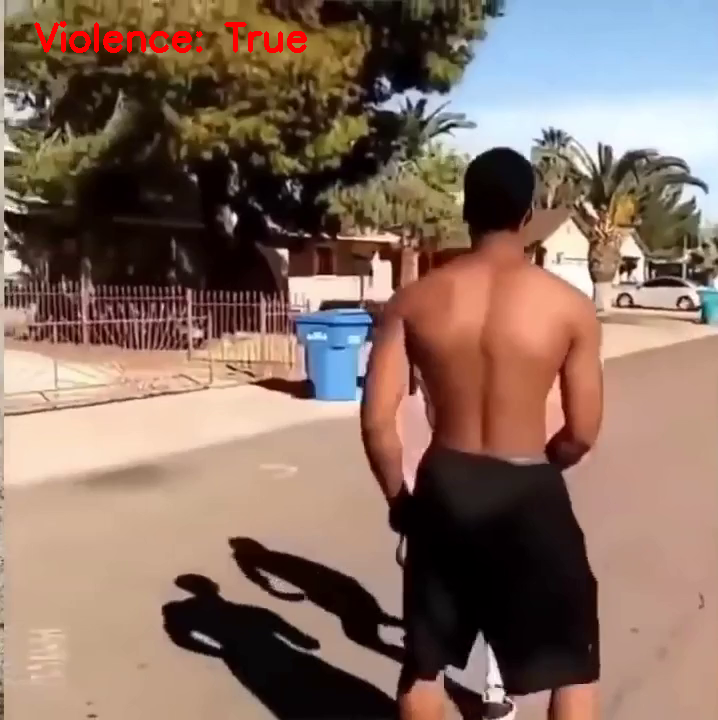

1/1 [==============================] - 0s 35ms/step


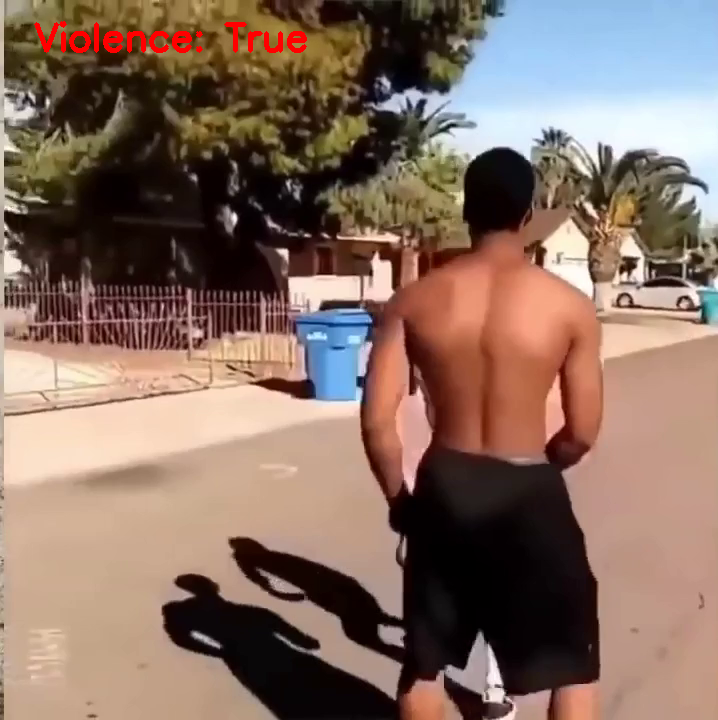

1/1 [==============================] - 0s 41ms/step


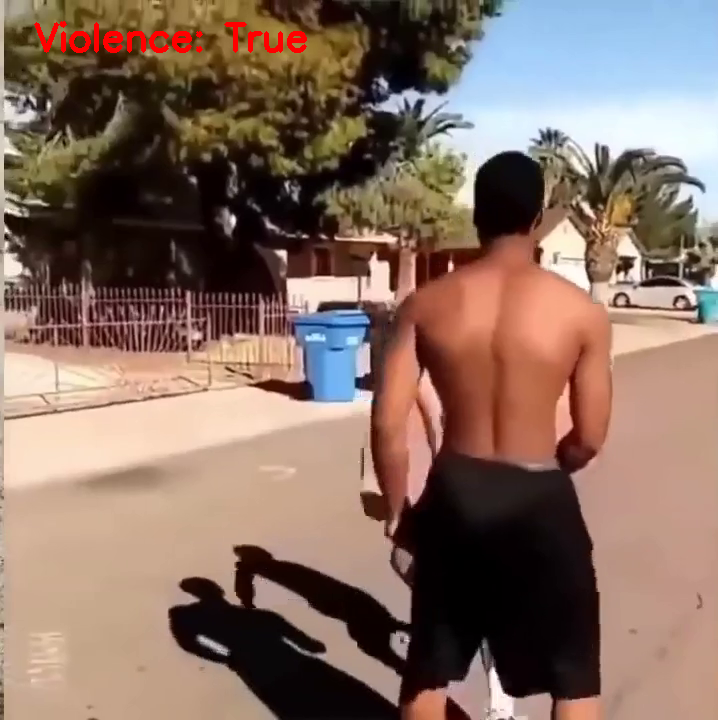

1/1 [==============================] - 0s 34ms/step


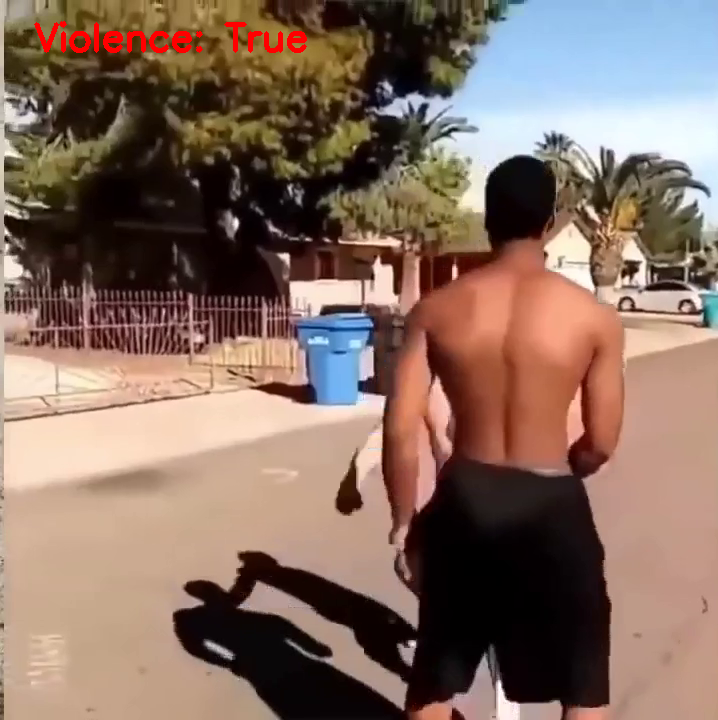

1/1 [==============================] - 0s 34ms/step


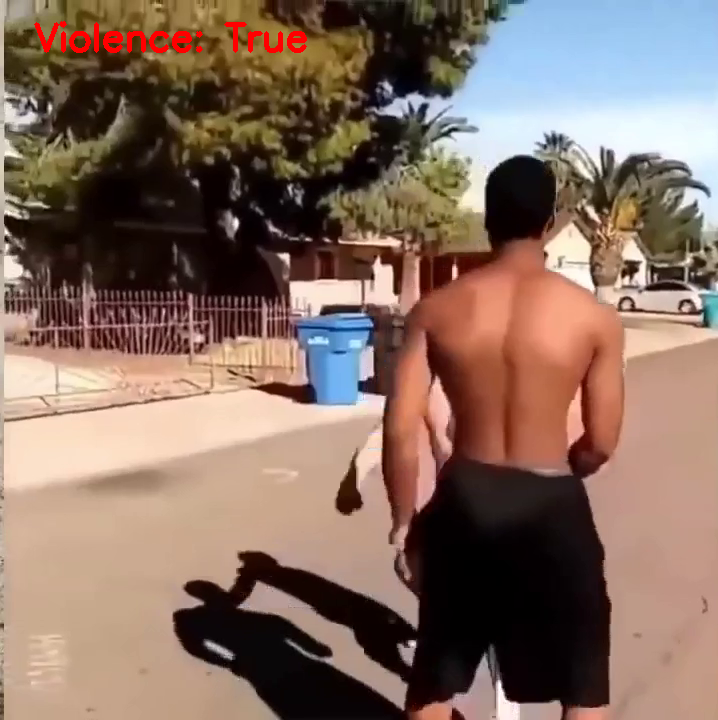

1/1 [==============================] - 0s 29ms/step


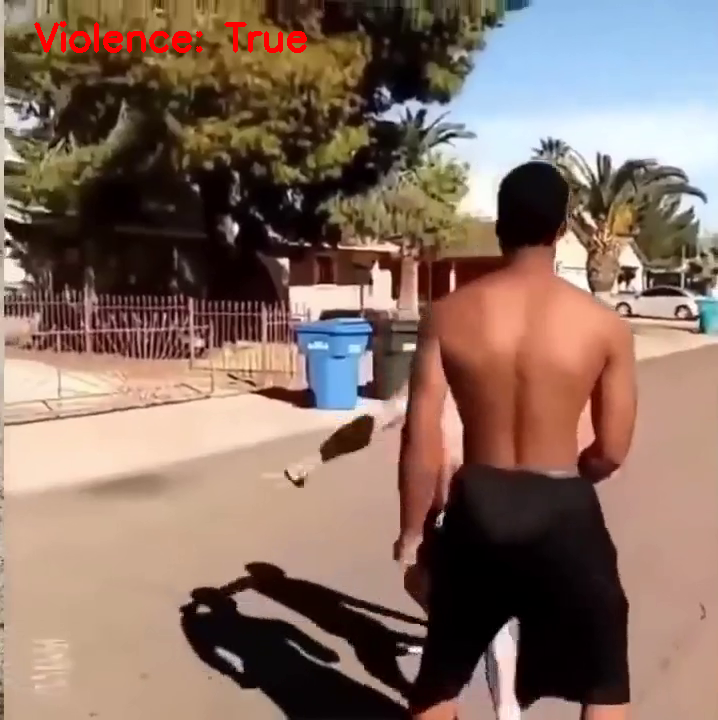

1/1 [==============================] - 0s 37ms/step


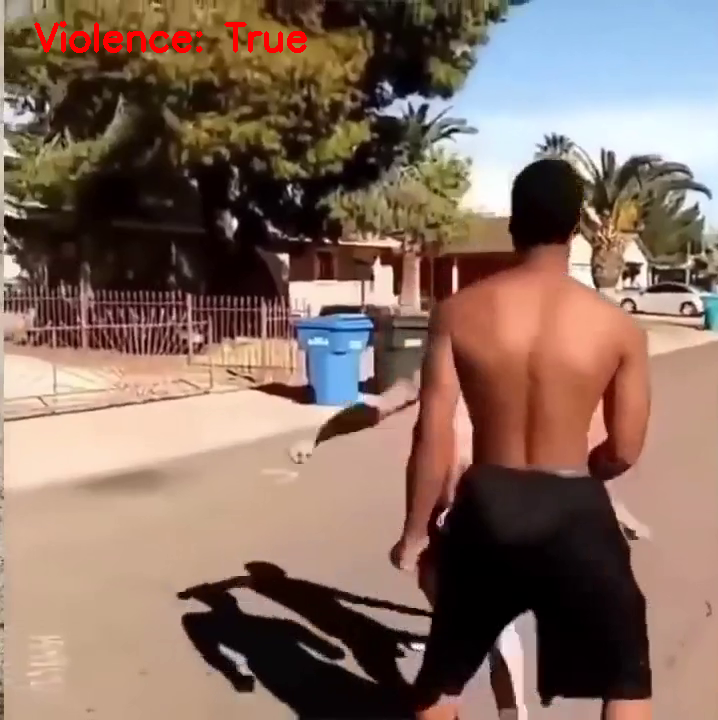

1/1 [==============================] - 0s 30ms/step


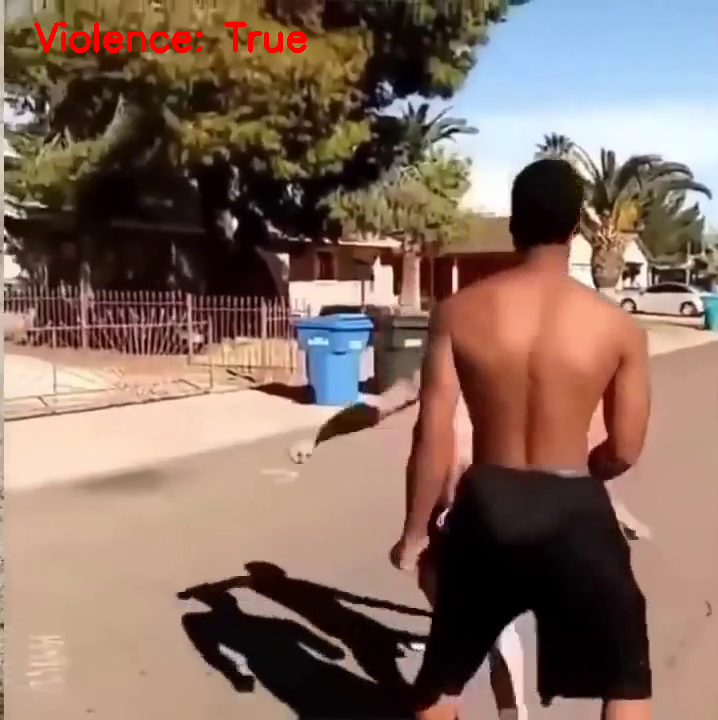

1/1 [==============================] - 0s 38ms/step


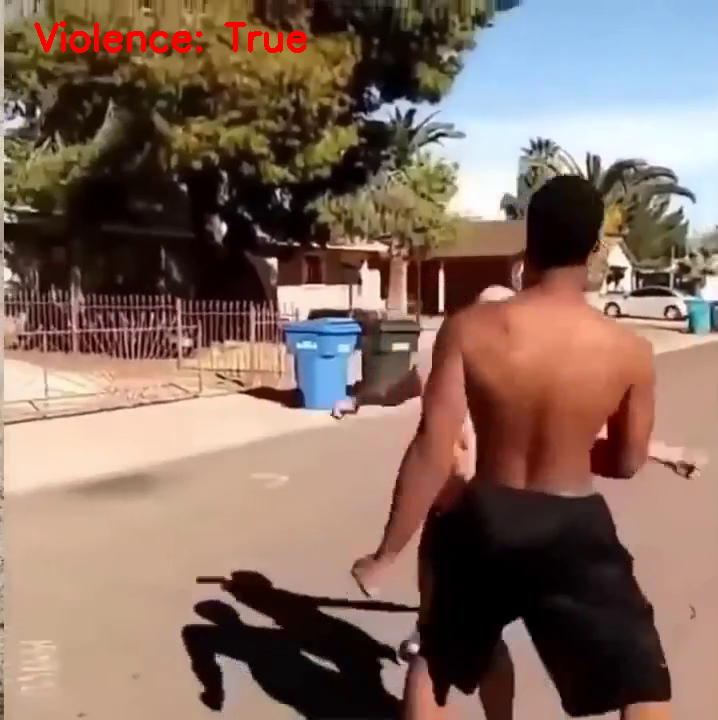

1/1 [==============================] - 0s 31ms/step


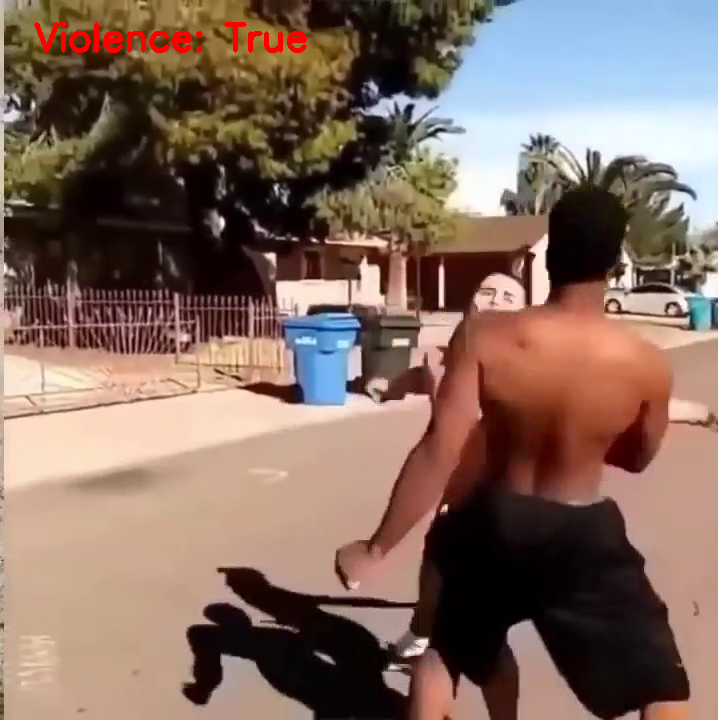

1/1 [==============================] - 0s 32ms/step


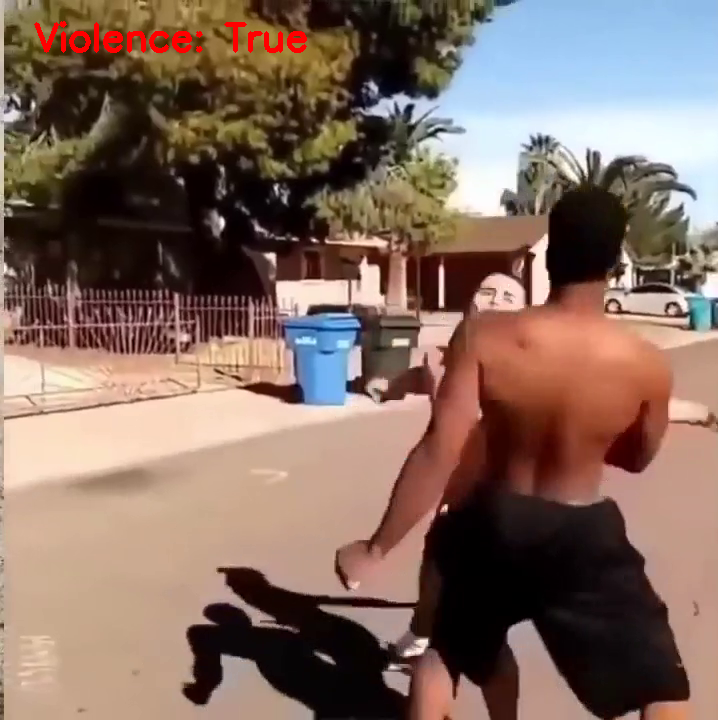

1/1 [==============================] - 0s 33ms/step


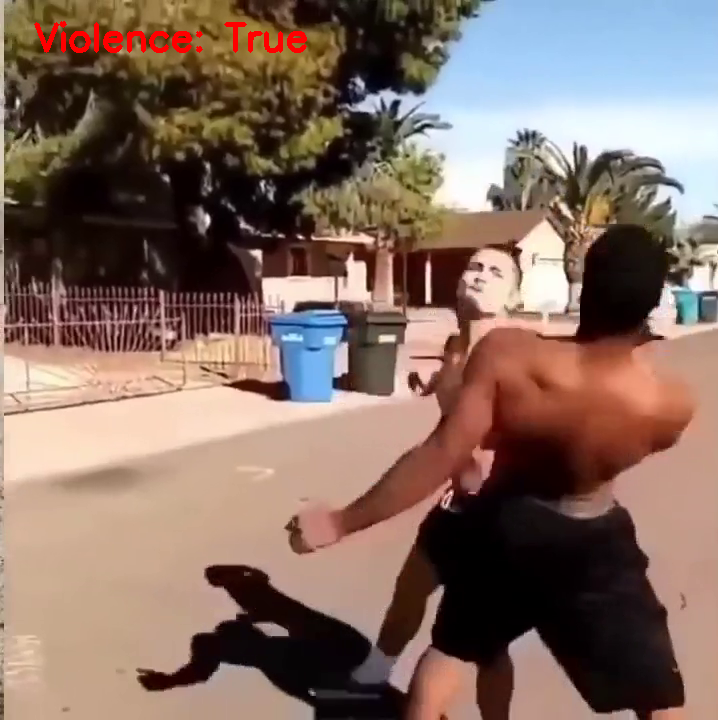

1/1 [==============================] - 0s 38ms/step


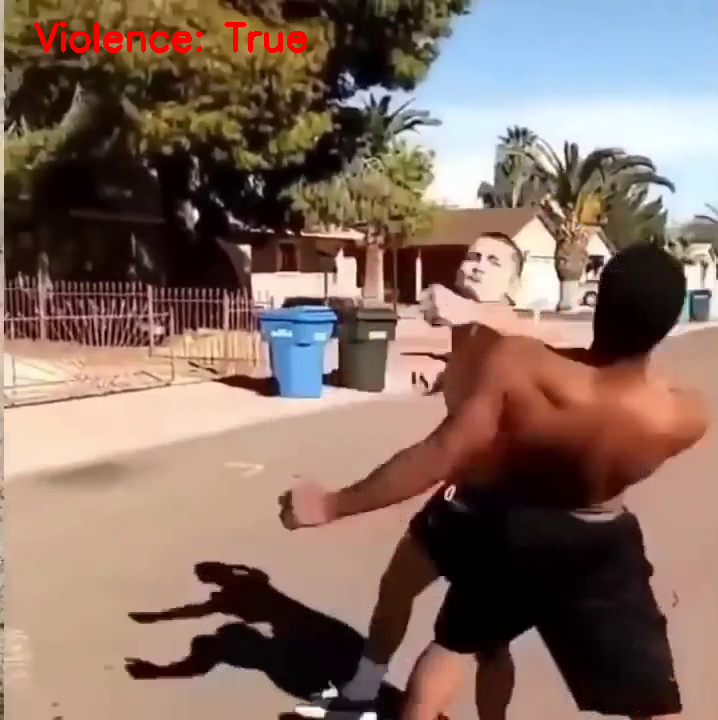

1/1 [==============================] - 0s 31ms/step


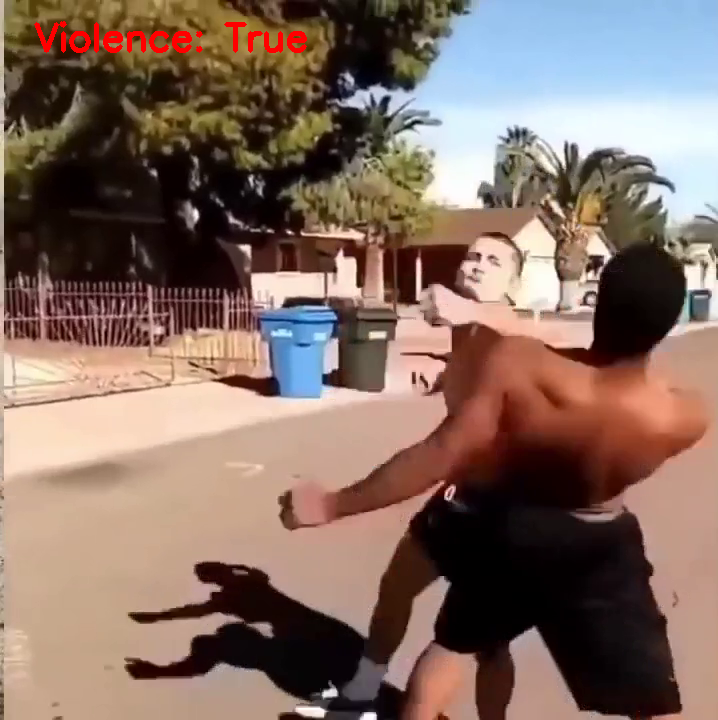

1/1 [==============================] - 0s 34ms/step


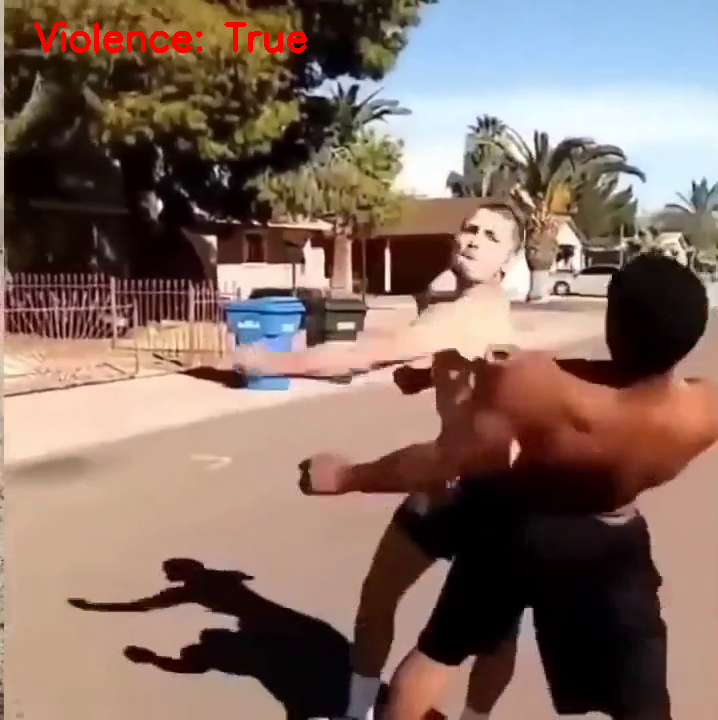

1/1 [==============================] - 0s 29ms/step


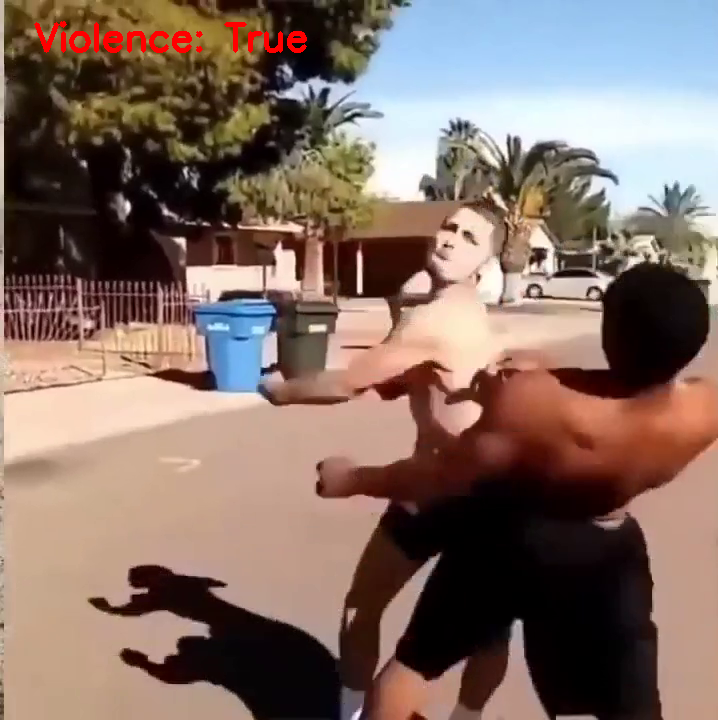

1/1 [==============================] - 0s 34ms/step


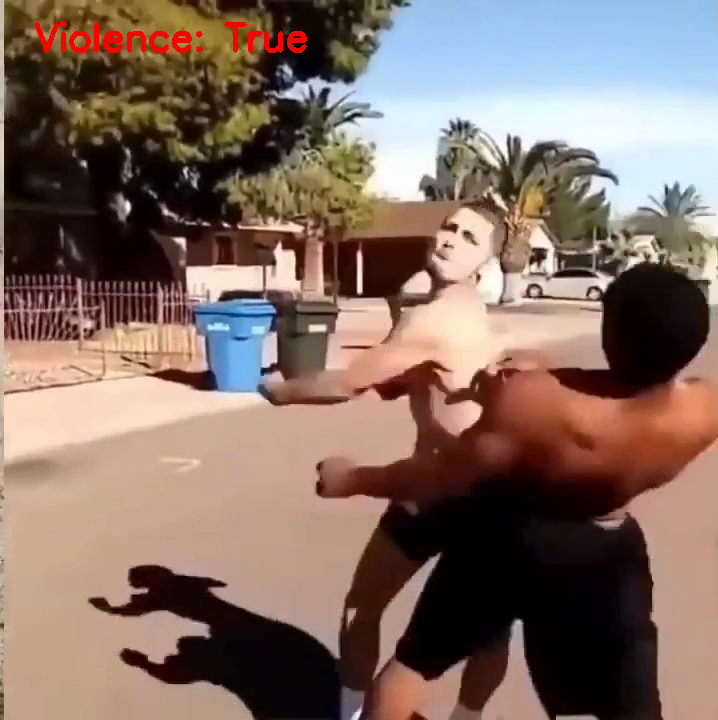

1/1 [==============================] - 0s 70ms/step


In [ ]:
print_results(V_path)